### Notebook for generating the accuracies figure for the different outlier datasets 

In [2]:
using CairoMakie
using XLSX
using RData
using DataFrames

In [18]:
file_path = "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/Thesis writing/Combined results.xlsx"
sheet = "Outliers"

data = DataFrame(XLSX.readtable(file_path, sheet))

population_size = 20 

data = data ./20 .* 100
# Move the last column to the first position
data = hcat(data[:, end], data[:, 1:end-1])


Row,x1,LCTA,NN
,Float64,Float64,Float64
1,35.0,35.0,35.0
2,55.0,35.0,35.0
3,30.0,35.0,35.0
4,40.0,30.0,35.0
5,50.0,40.0,35.0
6,45.0,35.0,35.0
7,35.0,35.0,35.0
8,45.0,30.0,35.0
9,50.0,35.0,45.0


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


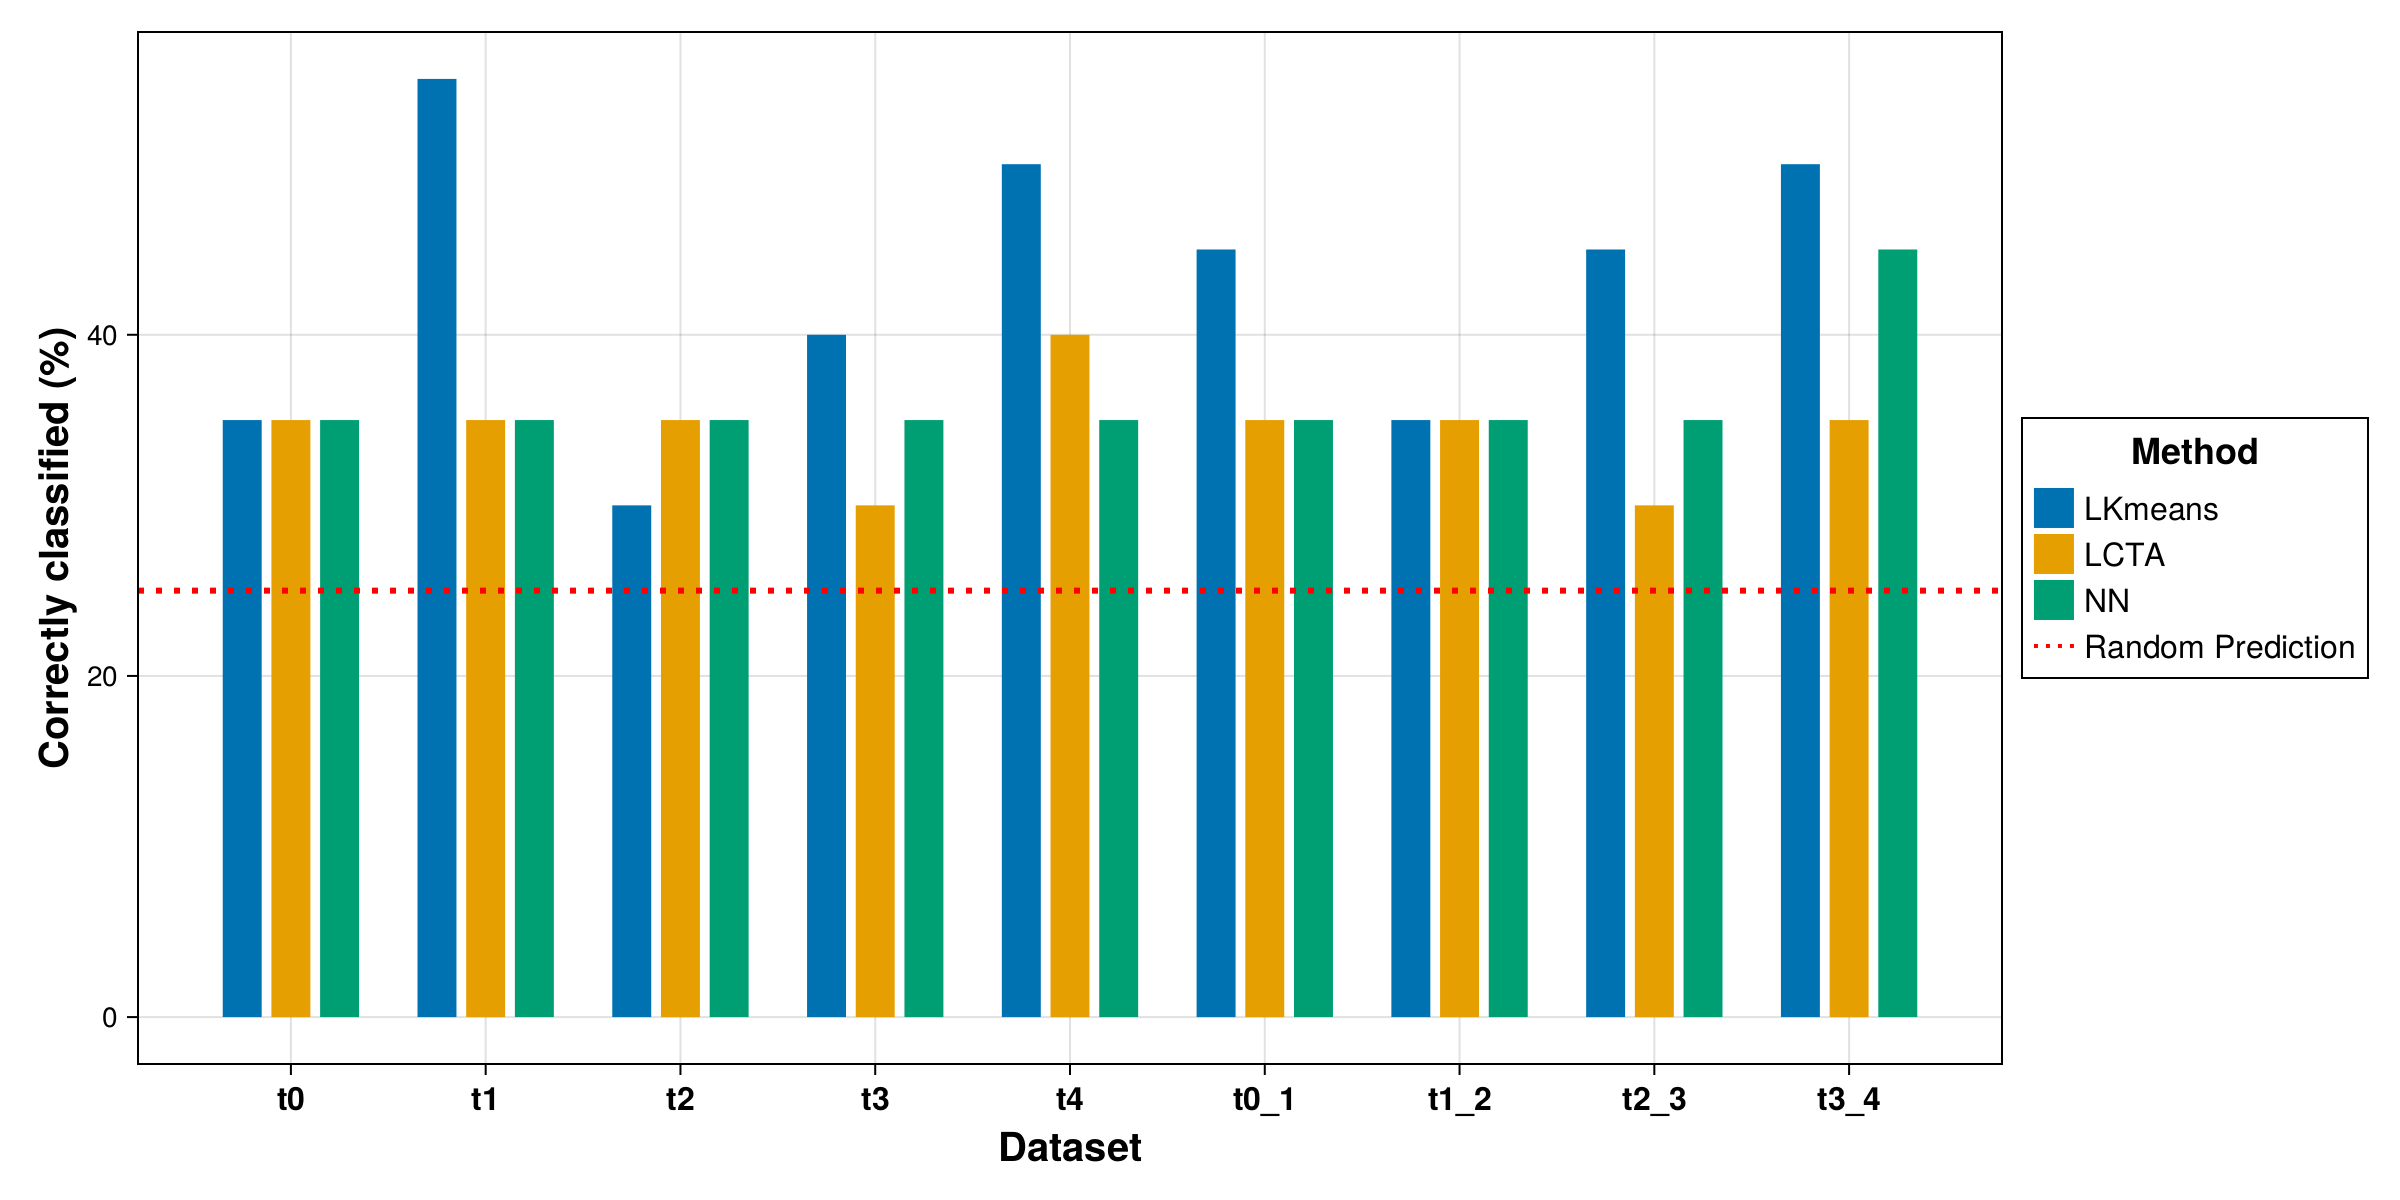

In [20]:
# Define row and column names
row_names = ["t0", "t1", "t2", "t3", "t4", "t0_1", "t1_2", "t2_3", "t3_4"]
column_names = ["LKmeans", "LCTA", "NN"]

# Define colors for methods (consistent with previous plots)
colormap = Makie.wong_colors()[1:3]  # First 3 colors from Wong palette
method_colors = Dict(column_names .=> colormap)

# Create figure
fig = Figure(resolution = (1200, 600))
ax = Axis(fig[1, 1], 
          xlabel = "Dataset", 
          ylabel = "Correctly classified (%)", 
          xlabelsize = 20, ylabelsize = 20, 
          xticklabelsize = 16, yticklabelsize = 14, 
          xlabelfont = :bold, ylabelfont = :bold,
          xticklabelfont = :bold,
          xticks = (1:length(row_names), row_names))

# Define bar positions and width
x = 1:length(row_names)  # x positions for datasets
bar_width = 0.25  # Width of each bar
offsets = [-bar_width, 0, bar_width]  # Offsets for each method

# Plot bars for each method
for (i, method) in enumerate(column_names)
    barplot!(x .+ offsets[i], data[:, i], color = method_colors[method], width = bar_width)
end

# Add red dotted line at y = 25%
hlines!(25, color = :red, linestyle = :dot, linewidth = 3)

# Add legend
Legend(fig[1, 2], 
       [PolyElement(color = method_colors[method]) for method in column_names] ∪ [LineElement(color = :red, linestyle = :dot, linewidth = 2)], 
       column_names ∪ ["Random Prediction"], "Method", labelsize = 16, titlesize = 18)

# Adjust layout spacing
colgap!(fig.layout, 10)
rowgap!(fig.layout, 10)

# Display figure
fig

# Save figure
# save("./correctly_classified_percentage.png", fig)